In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy.stats import norm, skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
pd.set_option('precision', 3)
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# LOADING DATA

In [ ]:
raw_data = pd.read_csv("marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(raw_data))
raw_data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Νέα ενότητα

# Describing Dataset

Customer

1.   ID: Customer's unique identifier
2.   Year_Birth: Customer's birth year
3.   Education: Customer's education level
4.   Marital_Status: Customer's marital status
5.   Income: Customer's yearly household income
6.   Kidhome: Number of children in customer's household
7.   Teenhome: Number of teenagers in customer's household
8.   Dt_Customer: Date of customer's enrollment with the company
9.   Recency: Number of days since customer's last purchase
10.  Complain: 1 if customer complained in the last 2 years, 0 otherwise


Products 

1.   MntWines: Amount spent on wine in last 2 years
2.   MntFruits: Amount spent on fruits in last 2 years
3.   MntMeatProducts: Amount spent on meat in last 2 years
4.   MntFishProducts: Amount spent on fish in last 2 years
5.   MntSweetProducts: Amount spent on sweets in last 2 years
6.   MntGoldProds: Amount spent on gold in last 2 years

Promotion

1.   NumDealsPurchases: Number of purchases made with a discount
2.   AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0      otherwise
3.   AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
4.   AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
5.   AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
6.   AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
7.   Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


Place

1.   NumWebPurchases: Number of purchases made through the company’s web site
2.   NumCatalogPurchases: Number of purchases made using a catalogue
3.   NumStorePurchases: Number of purchases made directly in stores
4.   NumWebVisitsMonth: Number of visits to company’s web site in the last month






In [ ]:
raw_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000,2240.000,2216.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.0,2240.0,2240.000
mean,5592.160,1968.806,52247.251,0.444,0.506,49.109,303.936,26.302,166.950,37.525,27.063,44.022,2.325,4.085,2.662,5.790,5.317,0.073,0.075,0.073,0.064,0.013,0.009,3.0,11.0,0.149
std,3246.662,11.984,25173.077,0.538,0.545,28.962,336.597,39.773,225.715,54.629,41.280,52.167,1.932,2.779,2.923,3.251,2.427,0.260,0.263,0.260,0.245,0.115,0.096,0.0,0.0,0.356
min,0.000,1893.000,1730.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.0,11.0,0.000
25%,2828.250,1959.000,35303.000,0.000,0.000,24.000,23.750,1.000,16.000,3.000,1.000,9.000,1.000,2.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,3.0,11.0,0.000
50%,5458.500,1970.000,51381.500,0.000,0.000,49.000,173.500,8.000,67.000,12.000,8.000,24.000,2.000,4.000,2.000,5.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,3.0,11.0,0.000
75%,8427.750,1977.000,68522.000,1.000,1.000,74.000,504.250,33.000,232.000,50.000,33.000,56.000,3.000,6.000,4.000,8.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,3.0,11.0,0.000
max,11191.000,1996.000,666666.000,2.000,2.000,99.000,1493.000,199.000,1725.000,259.000,263.000,362.000,15.000,27.000,28.000,13.000,20.000,1.000,1.000,1.000,1.000,1.000,1.000,3.0,11.0,1.000


# Data Preprocessing-EDA

Handling missing values

In [ ]:
raw_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

So the only column that has null values is **Income** which has **24 null values**.

In [ ]:
raw_data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Education,Marital_Status ans Dt_Customer should be encoded because as objects types cannot be easily explored or related with other features apart from Dt_Customer that is a date type and should be modified

In [ ]:
df1=raw_data.copy()

**Data Cleaning and Preprocessing steps:**  


1.   Remove and replace Nan values with the average income value
2.   Encoding in Education and Marital_Status
3.   Modifying Dt_Customer and Year_Birth
4.   Create feature 'Children' to combine kids and teen data to avoid multicollinearity
5.   To get further clarity of household, Creating feature indicating "Family_Size"
6.   Create a feature 'Is_Parent' to indicate parenthood status
7.   Drop Year_Birth,Z_CostContact,Z_Revenue,ID,Dt_Customer



In [ ]:
#Remove and replace Nan values with the average income value
raw_data.Income = pd.to_numeric(raw_data.Income)
raw_data[['Income']] = raw_data[['Income']].replace(np.nan, raw_data.Income.mean())

#Age of customer today 
raw_data["Age"] = 2014-raw_data["Year_Birth"]

#Total spendings on various items
raw_data["Spent"] = raw_data["MntWines"]+ raw_data["MntFruits"]+ raw_data["MntMeatProducts"]+ raw_data["MntFishProducts"]+ raw_data["MntSweetProducts"]+ raw_data["MntGoldProds"]

#for visualization
df2=raw_data.copy()

#Deriving living situation by marital status"Alone"
raw_data["Marital_Status"]=raw_data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
raw_data["Children"]=raw_data["Kidhome"]+raw_data["Teenhome"]

#Feature for total members in the householde
raw_data["Family_Size"] = raw_data["Marital_Status"].replace({"Alone": 1, "Partner":2})+ raw_data["Children"]

#Feature pertaining parenthood
raw_data["Is_Parent"] = np.where(raw_data.Children> 0, 1, 0)

#Segmenting education levels in three groups
raw_data["Education"]=raw_data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
raw_data=raw_data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Encoded
#1 ordinal encoding for 
from sklearn.preprocessing import OrdinalEncoder

education_column = raw_data[["Education"]]

encoder = OrdinalEncoder()
raw_data[["Education"]] = encoder.fit_transform(education_column)

#2 one hot encoded 

from sklearn.preprocessing import OrdinalEncoder

marital_column = raw_data[["Marital_Status"]]

encode = OrdinalEncoder()
raw_data[["Marital_Status"]] = encode.fit_transform(marital_column)

##drop irrelevant columns 
to_drop = ["Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
raw_data = raw_data.drop(to_drop, axis=1) 

data=raw_data
##dipslay cleaned data
data.head()




,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent
0,0.0,0.0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,1617,0,1,0
1,0.0,0.0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,27,2,3,1
2,0.0,1.0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,776,0,2,0
3,0.0,1.0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,53,1,3,1
4,1.0,1.0,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,422,1,3,1


# EDA(Exploration Data Analysis)

Heatmap-All variables

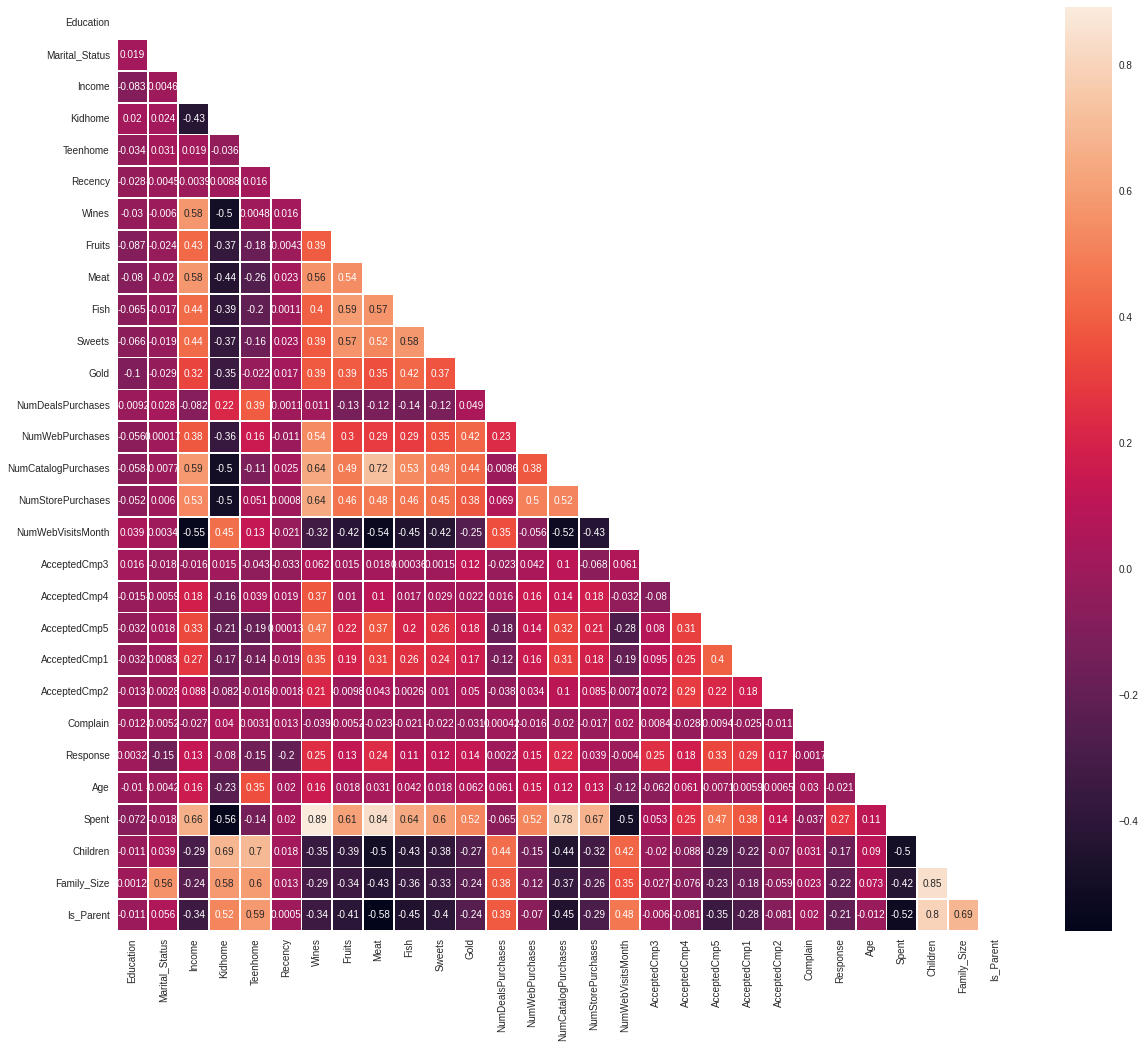

In [ ]:
corr_data = data
plt.figure(figsize=(20, 17))
matrix = np.triu(corr_data.corr())
sns.heatmap(corr_data.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="rocket");

Correlation of Spent feature

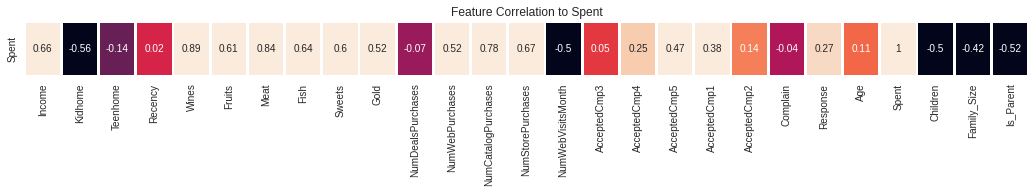

In [ ]:
'''Plot Correlation to Target Variable only'''
def corrMat2(data,target='Spent',figsize=(18,1),ret_id=False):
    
    corr_mat = data.corr().round(2);shape = corr_mat.shape[0]
    corr_mat = corr_mat.transpose()
    corr = corr_mat.loc[:, data.columns == target].transpose().copy()
    if(ret_id is False):
        f, ax = plt.subplots(figsize=figsize)
        sns.heatmap(corr,vmin=-0.3,vmax=0.3,center=0, 
                     cmap='rocket',square=False,lw=2,annot=True,cbar=False)
        plt.title(f'Feature Correlation to {target}')
    
    if(ret_id):
        return corr
corrMat2(data.drop(['Education','Marital_Status'],axis = 1))

**Spent** apart from the products is strongly related with                      **Kidhome,NumWebVisitsMonth,Family_Size,Is_Parent**
.So,spents are decreasing when family has a lot of members or the customer visits web often.

**Education ~ Income**

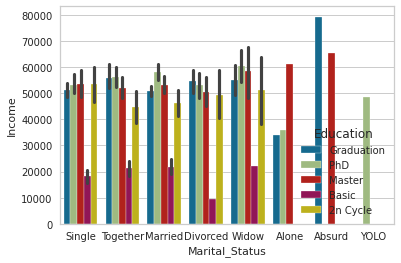

In [ ]:
obj = ['Education','Marital_Status']
for i in range(len(obj)):
    x='Marital_Status'
    for j in range(1):
        if obj[i] != x:
            sns.barplot(x= x,y='Income',hue=obj[i],data=df1)
            sns.set(rc={'figure.figsize':(15,12)})
            plt.show()

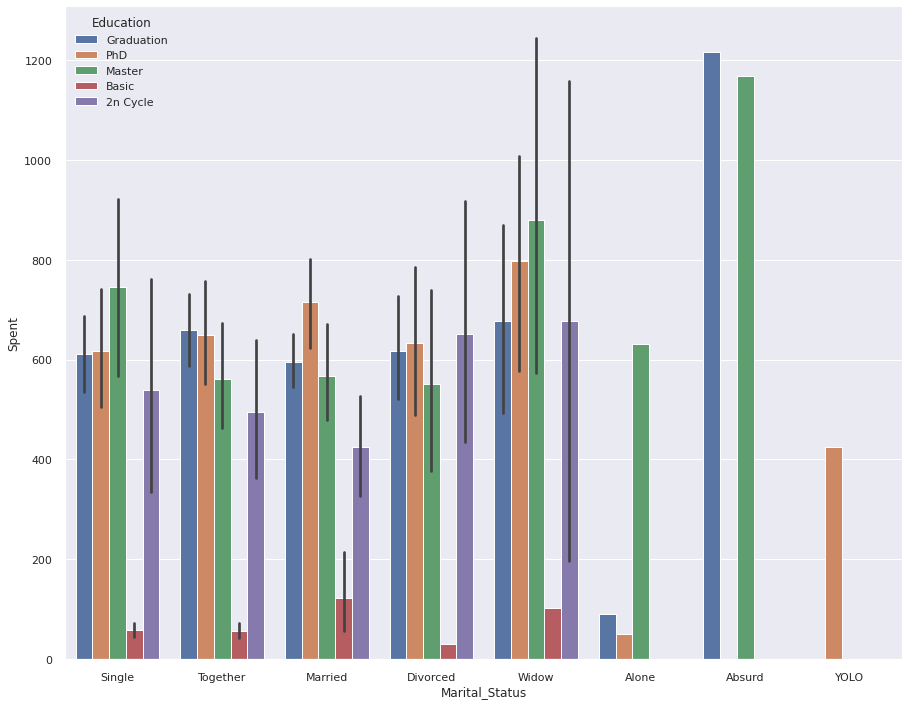

In [ ]:
obj = ['Education','Marital_Status']
for i in range(len(obj)):
    x='Marital_Status'
    for j in range(1):
        if obj[i] != x:
            sns.barplot(x= x,y='Spent',hue=obj[i],data=df2)
            sns.set(rc={'figure.figsize':(15,12)})
            plt.show()

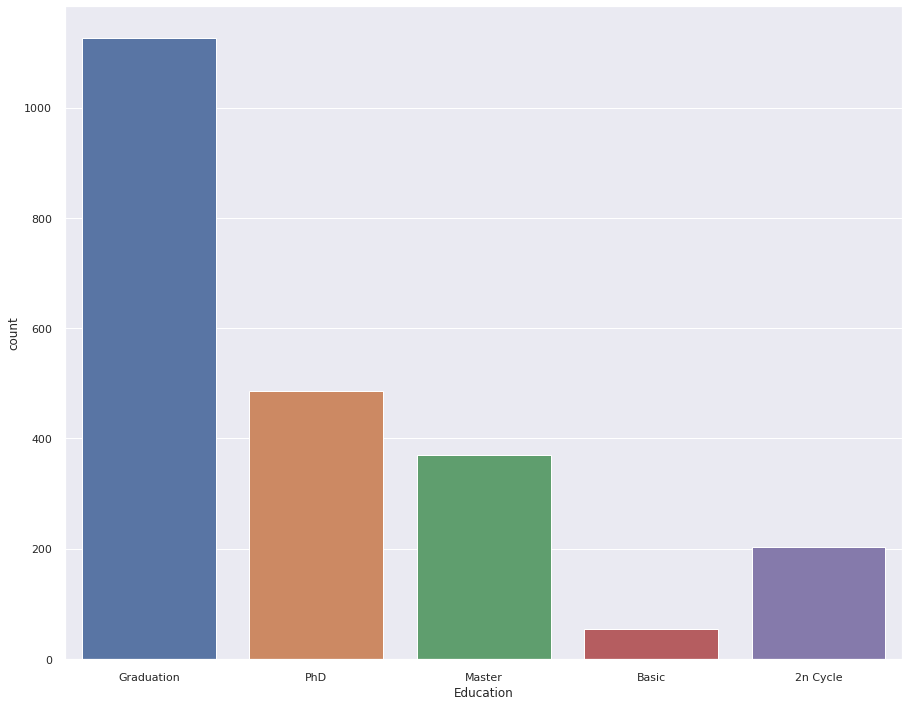

In [ ]:
sns.countplot(x = 'Education' , data = df1)
plt.show()

**Insight:**From the 3 above plots it can be assumed that the **most customers have graduated** (~50%) and the customers with this education are these that have **high income** and **high spents**.On contrast customers with **lower education** are **paid less so they pay less.**

Pairplots

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 1080x864 with 0 Axes>

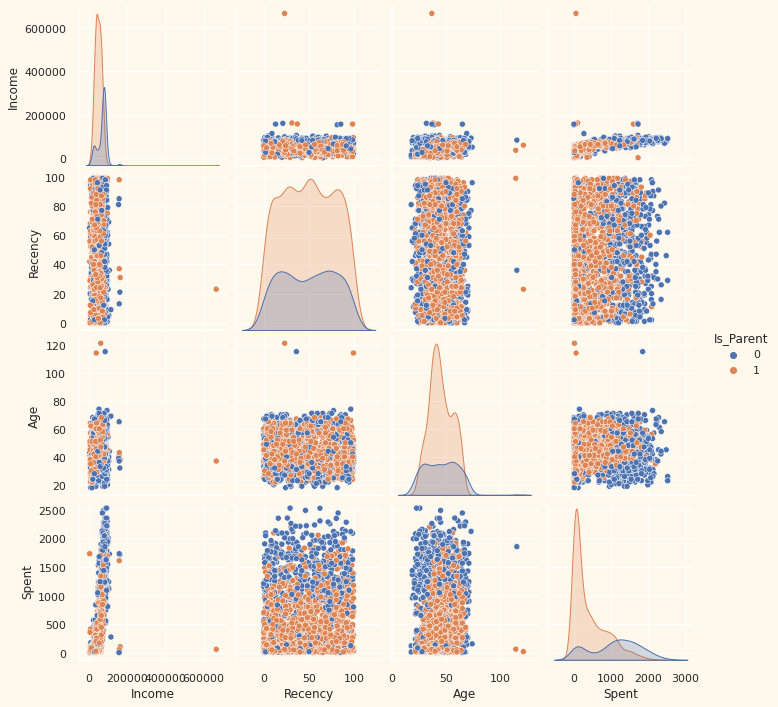

In [ ]:
#To plot some selected features 
#Setting up colors prefrences
from matplotlib.colors import ListedColormap

sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
#Plotting following features
To_Plot = [ "Income", "Recency", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent")
#Taking hue 
plt.show()

**Insight **:The total spents of a customer is related to his income

**Insight **:There are some outliers f.e ages over 110 years old

Finding and handling outliers using tukey method

In [ ]:
factors = ['Age','Income','Spent']
def find_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outliers = x[(x<min_range) | (x>max_range)]
    return outliers
for col in factors:
    outliers = find_outliers(data[col])
    if len(outliers):
        print(f"* {col} has these  outliers,\n{outliers}\n")
        print(f"* {col} has {data[col].count()}   values.\n")
        print(f"* Percentage of outliers is {100*len(outliers)/data[col].count()} %  \n")
    else:
        print(f"* {col} doesn't have any  outliers.\n")

* Age has these  outliers,
192    114
239    121
339    115
Name: Age, dtype: int64

* Age has 2240   values.

* Percentage of outliers is 0.13392857142857142 %  

* Income has these  outliers,
164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64

* Income has 2240   values.

* Percentage of outliers is 0.35714285714285715 %  

* Spent has these  outliers,
1179    2525
1492    2524
1572    2525
Name: Spent, dtype: int64

* Spent has 2240   values.

* Percentage of outliers is 0.13392857142857142 %  



These outliers are a small percentage of the data so they can be easily deleted without losing any important information

In [ ]:
data = data[(data["Age"]<114)]
data = data[(data["Income"]<666000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2236


Boxplots and distplots for the most important features

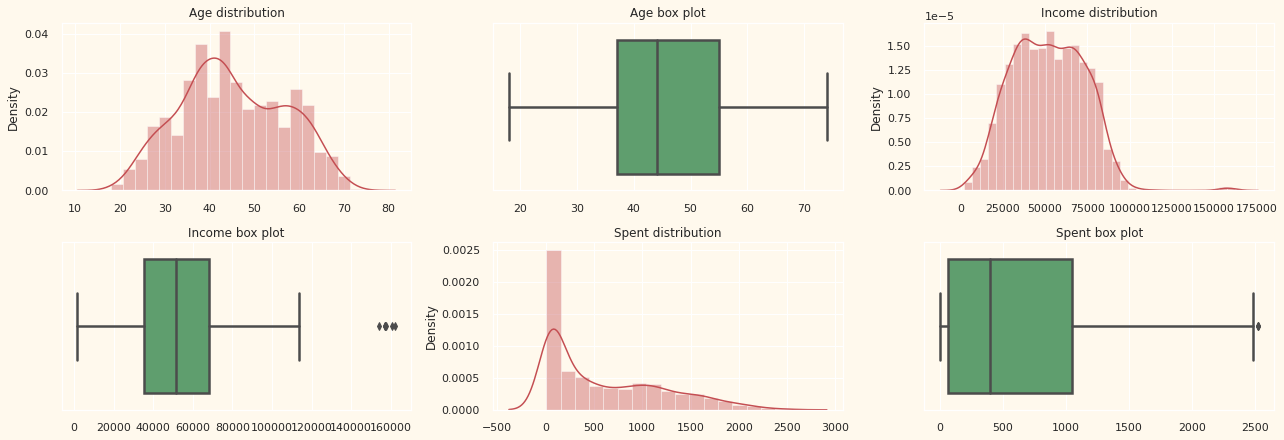

In [ ]:
rows = len(factors)
cols = 3

fig = plt.figure(2, (18, rows*3))

i = 0
for col in factors:
    ###DISTRIBUTION PLOTS###
    i += 1
    ax1 = plt.subplot(rows, cols,i)

    sns.distplot(data[col],color='r')
    ax1.set_xlabel(None)
    ax1.set_title(f'{col} distribution')
    plt.tight_layout()
    ###BOX PLOTS###

    i += 1
    ax2 = plt.subplot(rows, cols,i)
    sns.boxplot(data[col],color='g', orient='h', linewidth=2.5)
    ax2.set_xlabel(None)
    ax2.set_title(f'{col} box plot')
    plt.tight_layout()

The black dots are the outliers and it can be seen that in income and spents have not all deleted ,yet in income and spents does not exist a ground truth on contrast with age 

Text(0.5, 1.0, 'percentage of parents')

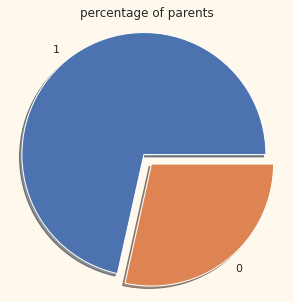

In [ ]:
labels = pd.value_counts(data['Is_Parent']).keys()
sizes = pd.value_counts(data['Is_Parent'])
# Explode the most frequent category:
explode = [0] * len(sizes)
explode[np.argmax(list(sizes))] = 0.1
plt.figure(figsize=(5, 5))
properties = plt.pie(sizes, labels=labels, explode=explode, shadow=True)    
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('percentage of parents')

Text(0.5, 1.0, 'Number of members of a family')

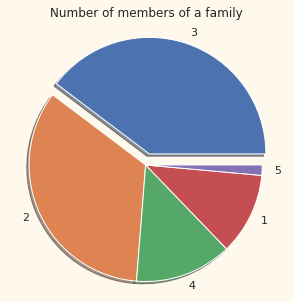

In [ ]:
labels = pd.value_counts(data['Family_Size']).keys()
sizes = pd.value_counts(data['Family_Size'])
# Explode the most frequent category:
explode = [0] * len(sizes)
explode[np.argmax(list(sizes))] = 0.1
plt.figure(figsize=(5, 5))
properties = plt.pie(sizes, labels=labels, explode=explode, shadow=True)    
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Number of members of a family')

**Insight:**The majority of families consist of 2 or 3 persons

# Feature Scaling and Standarization  as a part of Data Preprocessing

AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1,AcceptedCmp2, Complain, Response are deleted because are not giving important information for  the segmentation of customers. 

In [ ]:
del_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = data.drop(del_cols, axis=1)
scaler = StandardScaler()
scaler.fit(ds)
scaled_features = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
scaled_features.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Children,Family_Size,Is_Parent
0,-0.894,-1.348,0.289,-0.825,-0.931,0.307,0.983,1.554,1.680,2.461,1.475,0.846,0.349,1.408,2.510,-0.552,0.693,1.017,1.680,-1.264,-1.759,-1.584
1,-0.894,-1.348,-0.262,1.033,0.906,-0.384,-0.871,-0.636,-0.713,-0.650,-0.632,-0.730,-0.169,-1.111,-0.569,-1.168,-0.131,1.273,-0.962,1.395,0.446,0.631
2,-0.894,0.742,0.918,-0.825,-0.931,-0.798,0.362,0.572,-0.177,1.345,-0.147,-0.038,-0.686,1.408,-0.227,1.293,-0.544,0.333,0.283,-1.264,-0.657,-1.584
3,-0.894,0.742,-1.183,1.033,-0.931,-0.798,-0.871,-0.561,-0.651,-0.504,-0.583,-0.749,-0.169,-0.751,-0.911,-0.552,0.281,-1.291,-0.919,0.065,0.446,0.631
4,0.571,0.742,0.296,1.033,-0.931,1.550,-0.390,0.421,-0.217,0.155,-0.002,-0.557,1.384,0.328,0.115,0.063,-0.131,-1.034,-0.306,0.065,0.446,0.631


# Dimensionality reduction using PCA

In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
#increasing interpretability but at the same time minimizing information loss.
pca = PCA(n_components=3)
pca.fit(scaled_features)
PCA_ds = pd.DataFrame(pca.transform(scaled_features), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,1.007e-16,2.872,-5.936,-2.544,-0.784,2.375,7.416
col2,2236.0,-2.562e-17,1.699,-4.291,-1.329,-0.143,1.241,6.082
col3,2236.0,-4.806e-17,1.151,-2.918,-0.902,-0.141,0.812,3.836


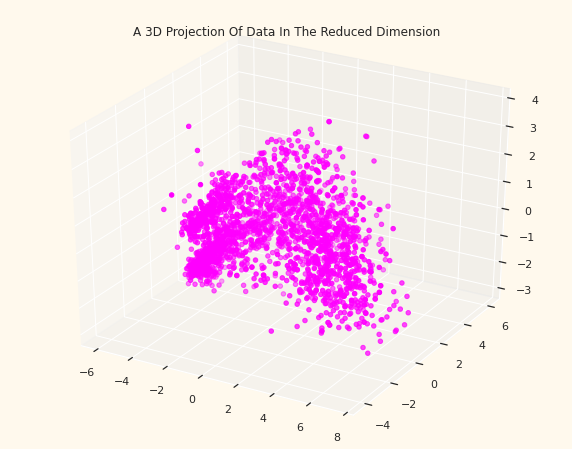

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="magenta", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# K-Means Algorithm for Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

**Elbow method**:It is a method to choose the best number of k(number of clusters) as far as computational complexity and accuracy is concerned.It is a point where diminishing returns are no longer worth the additional cost. In clustering, this means one should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.

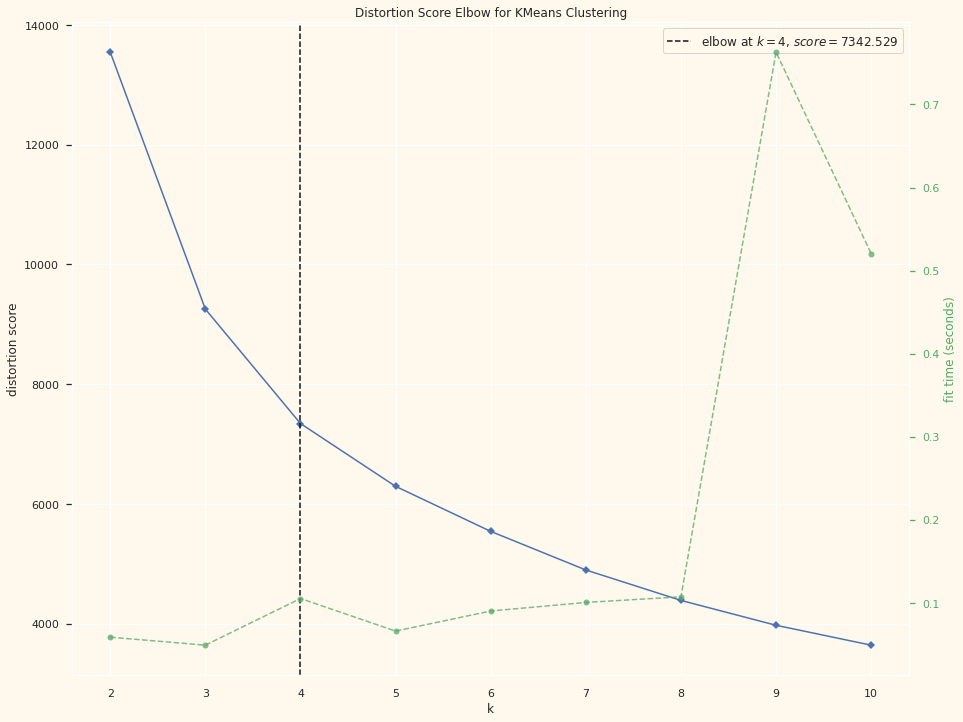

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)

visualizer.fit(PCA_ds)        # Fit the data to the visualizer
visualizer.show() 

In [ ]:
#Initiating the KMeans Clustering model 
KM = KMeans(n_clusters=4)
# fit model and predict clusters
KM_ds = KM.fit_predict(PCA_ds)
PCA_ds["Clusters"] = KM_ds
#Adding the Clusters feature to the orignal dataframe.
ds["Clusters"]= KM_ds

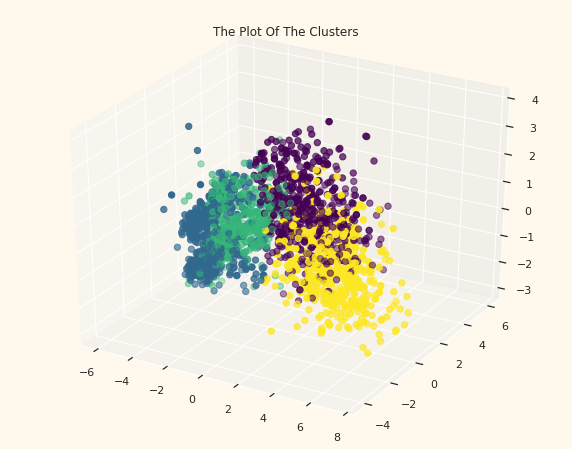

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

# Evaluating the K-Means model

**Countplot** of clusters 

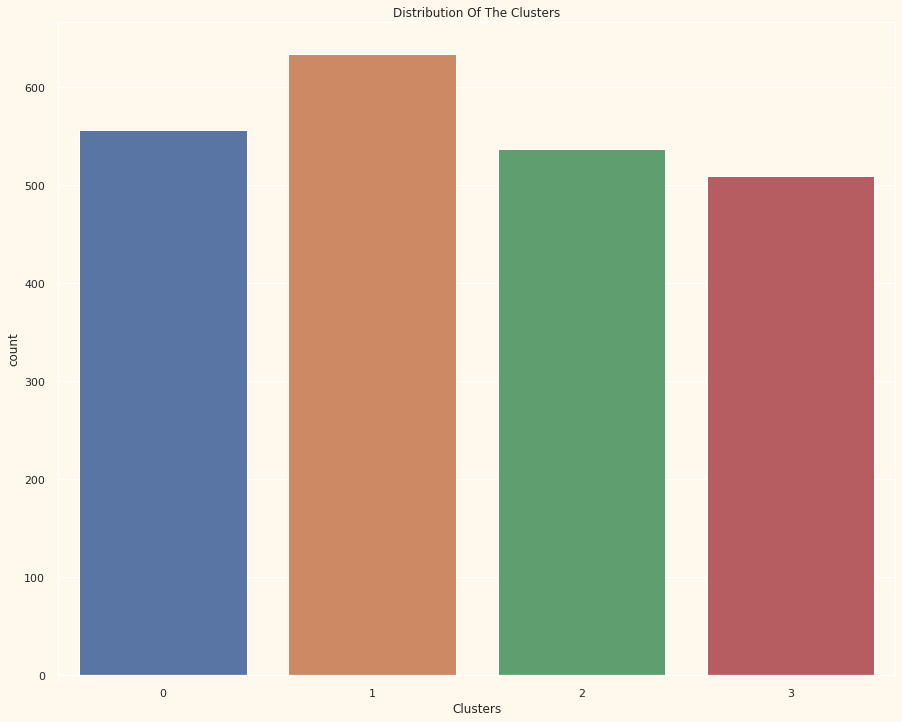

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=ds["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

**Scatterplot** to view the accuracy of K-Means Clustering

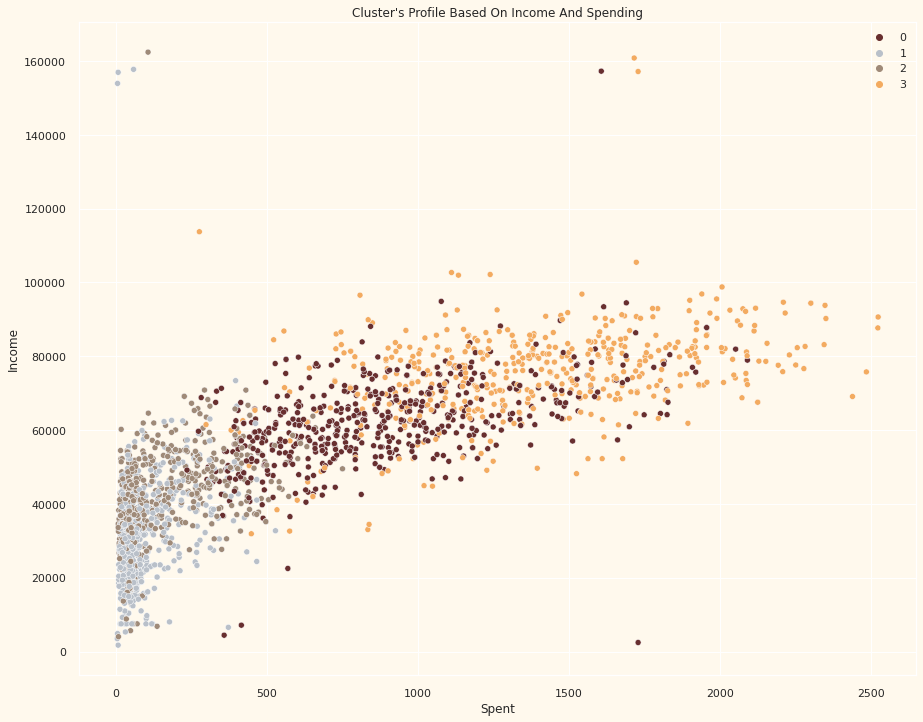

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.scatterplot(data = ds,x=ds["Spent"], y=ds["Income"],hue=ds["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

**Profile of 4 groups**:

1.  cluster **0**:**low spending** and **average income**
2.  cluster **1**:**high spending** and **high income**
3.  cluster **2**:**high spending** and **average income**
4.  cluster **3**:**low spending** and **low income**

**Boxplot** to view the outliers for each cluster

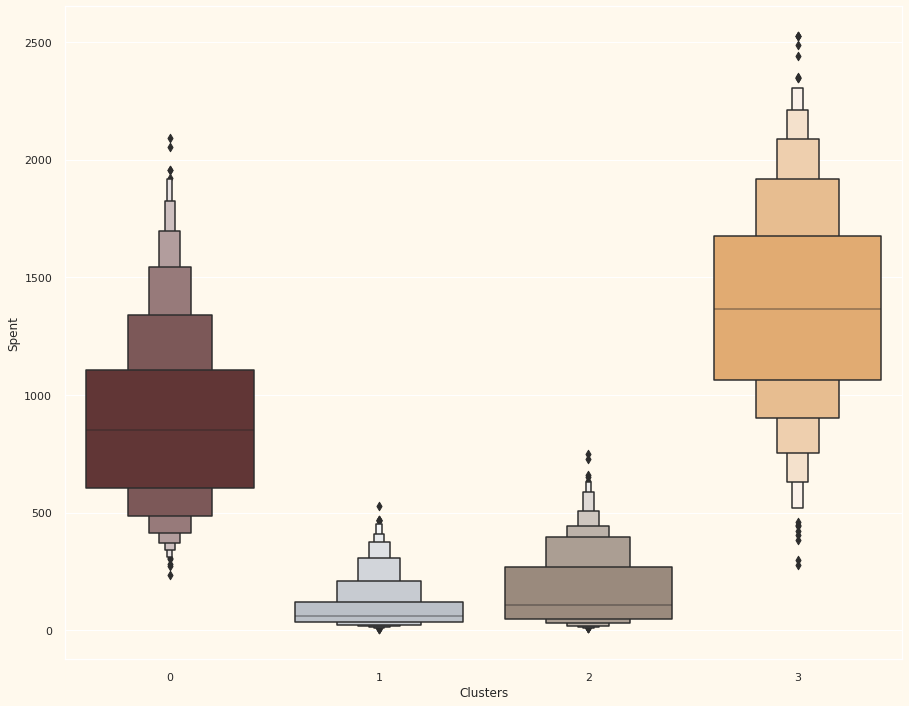

In [ ]:
plt.figure()

pl=sns.boxenplot(x=ds["Clusters"], y=ds["Spent"], palette= pal)
plt.show()

Cluster profile based on spent and income

# Profiling

With plotting we will investigate the characteristics for each cluster so as to klnow the firm how to approach them and what to expect to gain from them

<Figure size 1080x864 with 0 Axes>

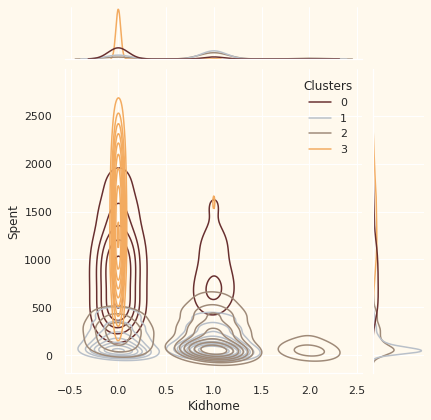

<Figure size 1080x864 with 0 Axes>

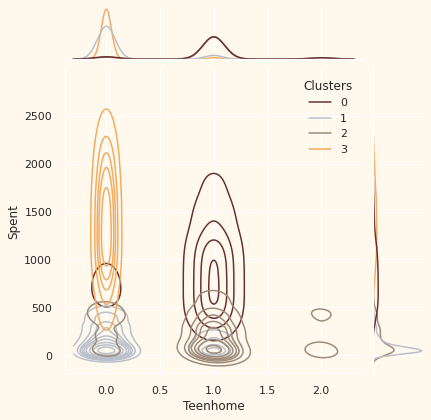

<Figure size 1080x864 with 0 Axes>

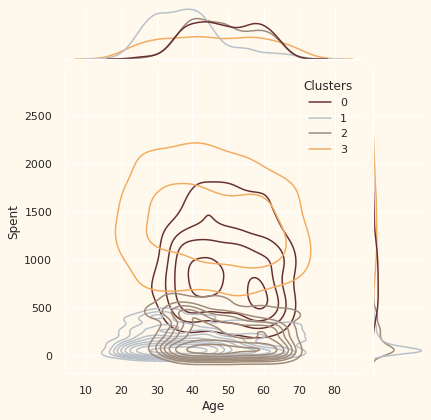

<Figure size 1080x864 with 0 Axes>

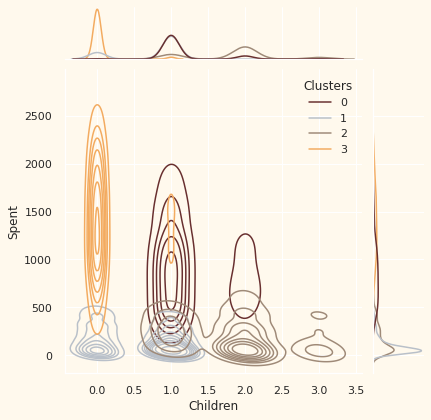

<Figure size 1080x864 with 0 Axes>

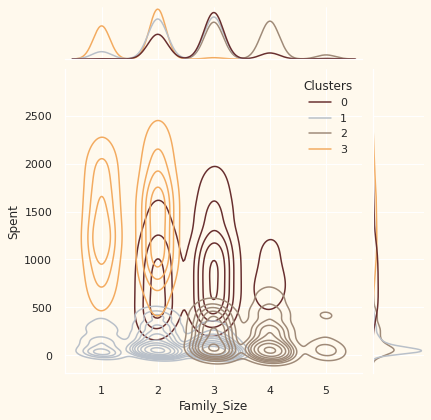

<Figure size 1080x864 with 0 Axes>

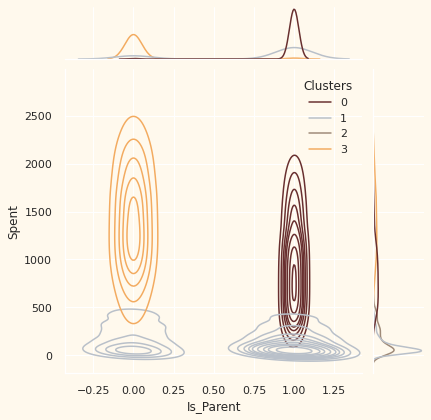

<Figure size 1080x864 with 0 Axes>

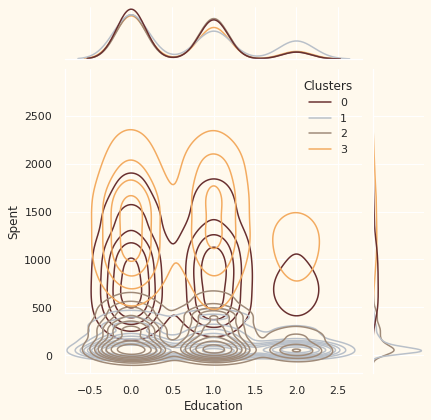

<Figure size 1080x864 with 0 Axes>

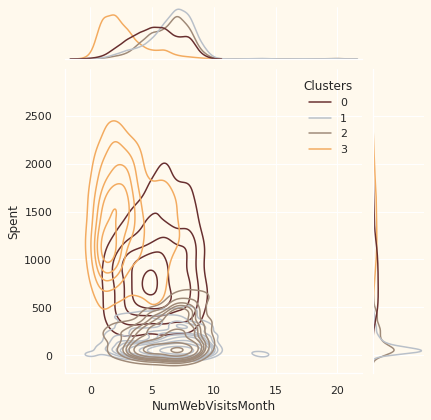

In [ ]:
Profiling_cols = [ "Kidhome","Teenhome", "Age", "Children", "Family_Size", "Is_Parent", "Education","NumWebVisitsMonth"]

for i in Profiling_cols:
    plt.figure()
    sns.jointplot(x=ds[i], y=ds["Spent"], hue =ds["Clusters"], kind="kde", palette=pal)
    plt.show()

**Conclusion of profiling:**
1.  **Cluster 0**: a)The size of the family has max 4 members b)they are definitely parents c)older than average d)high spending average income (1/4 of the total customers) e) low or average education
2. **Cluster 1**: a)The size of the family is max 3 b)they have at most 1 child or teen so maybe they re not parents c)younger than the average d)low spending and low income e)higher than average education
3.  **Cluster 2**: a) The size of the family is at least 3 b)they are definitely parents c)between 30 and 70 years old (old customers) d)low spending average income (1/4 of the total customers) e)higher than average education
4.  **Cluster 3**: a)Single or married b)they are not definetely parents c)spans all ages d)high sepnding high income (1/4 of the total customers) e)low or average education

# Suggestions to the grocery firm

1.  The customers that belong  to the Cluster **0** and **3** are the **most profitable** customers.So,having in common that have low or average education so especially for cluster 3 who they do not visit often web the firm could invest in  promotion of its products **through more traditional ways like newspapers or TV**.
2.   The grocery firm can make offers specifically for **small families or just couples** since this is a characteristic for cluster 0 and 3 f.e **packages of annual payments with dicounts for these clusters** to supply them with specific amount of products that they need.